In [1]:
import keras
from facedetection_v9 import FaceDetector

import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from keras.preprocessing.image import img_to_array

In [2]:
detector = FaceDetector()

In [3]:
model = keras.models.load_model('/content/mask_detection_v3.h5')

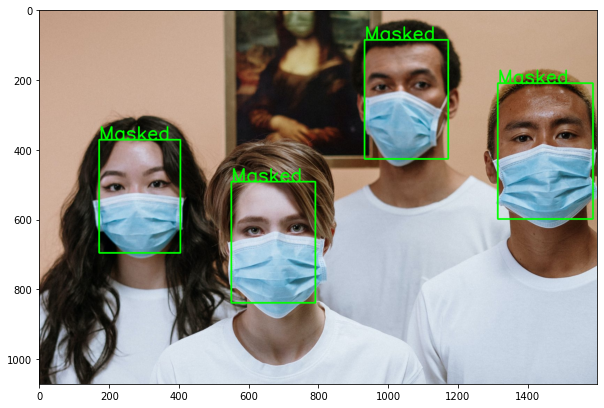

In [96]:
image = '/content/people-wearing-face-mask-for-protection-3957986-1600x1071.jpg'

frame, faces = detector.get_faces(image)

for face, box in faces:
    face = cv2.resize(face,(128,128))
    face = img_to_array(face)/255.0
    face = cv2.cvtColor(face, cv2.COLOR_RGB2BGR)
    face = np.array([face])

    Masked = np.argmax(model.predict(face))

    imageHeight, imageWidth = frame.shape[:-1]
    scale = 1 # this value can be from 0 to 1 (0,1] to change the size of the text relative to the image
    fontScale = min(imageWidth,imageHeight)/(600/scale)

    if Masked:
        cv2.putText(frame,'No_Mask', (box[0], box[1]), cv2.FONT_HERSHEY_SIMPLEX, fontScale, (255,0,0), 3)
        cv2.rectangle(frame, (box[0],box[1]), (box[2],box[3]), (255,0,0), 3)
    else:
        cv2.putText(frame,'Masked',(box[0], box[1]), cv2.FONT_HERSHEY_SIMPLEX, fontScale, (0,255,0), 3)
        cv2.rectangle(frame, (box[0],box[1]), (box[2],box[3]), (0,255,0), 3)

plt.figure(figsize=(10,20))
plt.imshow(frame);